## Mars Photogrammetry Preprocessing Pipeline

By Christian Tate, Cornell University; Ithaca, NY



In [1]:
# Import python modules

import numpy as np
import cv2, glob, time, os
import matplotlib.pyplot as plt
# from planetaryimage import PDS3Image
# import colour_demosaicing
# from PIL import Image
# import matplotlib.cm as cm
# from scipy import interpolate
# from scipy.spatial.transform import Rotation as R
# import colour_demosaicing
# import pandas as pd

%run MPPP.py

%matplotlib inline

In [7]:
# Set input path to IMG files and search criteria


# Set output directory
directory_output = 'Z:/Mastcam-Z/agisoft/images'

# Set input directory
directory_input  = 'Z:/Mastcam-Z/agisoft/data'

sol = 7

pre = 'Z*0_0'+str(sol)+'*_07'
suf = 'refs_'+str(sol).zfill(3)+'_zcam'

pre = '*F_0'+str(sol)+'*_07'
suf = 'refs_'+str(sol).zfill(3)+'_ecam'

pre = '*V0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_vec'

# pre = '_N'
# suf = 'refs_test'

sequ_id = ''

path_input      = directory_input
IMG_paths = [] 
if 'F_0' in pre or 'V0' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
if 'Z' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/zcam/sol_0*00s/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 

# IMG_paths = IMG_paths[:10]

print( len(IMG_paths), 'images\n')
IMG_paths

530 images



['Z:/Mastcam-Z/agisoft/data/datadrive\\00700\\ids\\rdr\\ncam\\NLMV0700_0729087537_524RAD_N0330354VCE_15950_0A02LLJ01.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00700\\ids\\rdr\\ncam\\NLMV0700_0729087578_785RAD_N0330354VCE_15950_0A02LLJ01.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00700\\ids\\rdr\\ncam\\NLMV0700_0729087632_492RAD_N0330360VCE_15950_0A02LLJ01.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00700\\ids\\rdr\\ncam\\NLMV0700_0729087657_037RAD_N0330360VCE_15950_0A02LLJ01.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00700\\ids\\rdr\\ncam\\NLMV0700_0729087720_256RAD_N0330365VCE_15950_0A02LLJ01.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00700\\ids\\rdr\\ncam\\NLMV0700_0729087775_493RAD_N0330366VCE_15950_0A02LLJ01.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00700\\ids\\rdr\\ncam\\NRMV0700_0729087537_524RAD_N0330354VCE_15950_0A02LLJ01.IMG',
 'Z:/Mastcam-Z/agisoft/data/datadrive\\00700\\ids\\rdr\\ncam\\NRMV0700_0729087578_785RAD_N0330354VCE_15950_0A02LLJ01.IMG',
 'Z:/Mastcam-Z/a

In [8]:
# # remove duplicates in image set

# %run MPPP.py
# remove_duplicate_IMGs( IMG_paths )

530 images

0 NLMV0700_0729087537_524RAD_N0330354VCE_15950_0A02LLJ01.IMG
sol 700 site 33 drive 354  zenith angle 4332 scale 0.84
 0 NLMV0700_0729087537_524RAD_N0330354VCE_15950_0A02LLJ01.png	-2367.8957	799.7163	43.9777	7.05	75.6	0


1 NLMV0700_0729087578_785RAD_N0330354VCE_15950_0A02LLJ01.IMG
sol 700 site 33 drive 354  zenith angle 4332 scale 0.84
 1 NLMV0700_0729087578_785RAD_N0330354VCE_15950_0A02LLJ01.png	-2367.946	799.3293	43.8334	7.05	75.6	0


2 NLMV0700_0729087632_492RAD_N0330360VCE_15950_0A02LLJ01.IMG
sol 700 site 33 drive 360  zenith angle 4416 scale 0.84
 2 NLMV0700_0729087632_492RAD_N0330360VCE_15950_0A02LLJ01.png	-2367.8977	799.1142	43.8227	13.08	77.06	0


3 NLMV0700_0729087657_037RAD_N0330360VCE_15950_0A02LLJ01.IMG
sol 700 site 33 drive 360  zenith angle 4416 scale 0.84
 3 NLMV0700_0729087657_037RAD_N0330360VCE_15950_0A02LLJ01.png	-2367.8977	799.1142	43.8227	13.08	77.06	0


4 NLMV0700_0729087720_256RAD_N0330365VCE_15950_0A02LLJ01.IMG
sol 700 site 33 drive 365  zenith angle 

37 NRMV0702_0729265186_445RAD_N0330389VCE_16000_0A02LLJ01.IMG
sol 702 site 33 drive 389  zenith angle 4288 scale 0.84
 37 NRMV0702_0729265186_445RAD_N0330389VCE_16000_0A02LLJ01.png	-2368.8799	800.0846	44.0575	338.11	74.83	0


38 NRMV0702_0729265209_761RAD_N0330389VCE_16000_0A02LLJ01.IMG
sol 702 site 33 drive 389  zenith angle 4242 scale 0.84
 38 NRMV0702_0729265209_761RAD_N0330389VCE_16000_0A02LLJ01.png	-2369.3081	800.7377	44.2511	338.61	74.02	0


39 NRMV0702_0729265231_541RAD_N0330389VCE_16000_0A02LLJ01.IMG
sol 702 site 33 drive 389  zenith angle 4116 scale 0.84
 39 NRMV0702_0729265231_541RAD_N0330389VCE_16000_0A02LLJ01.png	-2369.6661	801.4379	44.4132	338.73	71.83	0


40 NRMV0702_0729265254_292RAD_N0330389VCE_16000_0A02LLJ01.IMG
sol 702 site 33 drive 389  zenith angle 4042 scale 0.84
 40 NRMV0702_0729265254_292RAD_N0330389VCE_16000_0A02LLJ01.png	-2370.0095	802.1482	44.6017	341.45	70.54	0


41 NRMV0702_0729265276_801RAD_N0330389VCE_16000_0A02LLJ01.IMG
sol 702 site 33 drive 389  zenith 

74 NRMV0707_0729710626_372RAD_N0330522VCE_16000_0A02LLJ02.IMG
sol 707 site 33 drive 522  zenith angle 3772 scale 0.80
 74 NRMV0707_0729710626_372RAD_N0330522VCE_16000_0A02LLJ02.png	-2375.8376	828.5546	48.8224	340.23	65.82	0


75 NRMV0707_0729710847_026RAD_N0330551VCE_16000_0A02LLJ02.IMG
sol 707 site 33 drive 551  zenith angle 3651 scale 0.79
 75 NRMV0707_0729710847_026RAD_N0330551VCE_16000_0A02LLJ02.png	-2376.8841	829.9886	49.0502	316.61	63.72	0


76 NRMV0707_0729710980_182RAD_N0330567VCE_16000_0A02LLJ02.IMG
sol 707 site 33 drive 567  zenith angle 3319 scale 0.79
 76 NRMV0707_0729710980_182RAD_N0330567VCE_16000_0A02LLJ02.png	-2379.504	829.9449	48.995	286.53	57.92	0


77 NRMV0707_0729711258_725RAD_N0330580VCE_16000_0A02LLJ02.IMG
sol 707 site 33 drive 580  zenith angle 3358 scale 0.78
 77 NRMV0707_0729711258_725RAD_N0330580VCE_16000_0A02LLJ02.png	-2381.3311	830.2102	49.0026	287.93	58.61	0


78 NRMV0707_0729711371_536RAD_N0330586VCE_16000_0A02LLJ02.IMG
sol 707 site 33 drive 586  zenith an

sol 714 site 33 drive 4063  zenith angle 3282 scale 0.91
 110 NRMV0714_0730324503_101RAD_N0334063VCE_15900_0A02LLJ01.png	-2742.8802	1189.3489	79.3643	348.73	57.27	0


111 NRMV0714_0730324697_633RAD_N0334092VCE_15900_0A02LLJ01.IMG
sol 714 site 33 drive 4092  zenith angle 3595 scale 0.91
 111 NRMV0714_0730324697_633RAD_N0334092VCE_15900_0A02LLJ01.png	-2743.4598	1193.9029	79.6866	351.34	62.73	0


112 NRMV0714_0730324854_413RAD_N0334117VCE_15900_0A02LLJ01.IMG
sol 714 site 33 drive 4117  zenith angle 3315 scale 0.91
 112 NRMV0714_0730324854_413RAD_N0334117VCE_15900_0A02LLJ01.png	-2744.5326	1198.6885	79.7702	341.5	57.85	0


113 NRMV0714_0730330610_804RAD_N0334711TRAV00264_0A02LLJ02.IMG
sol 714 site 33 drive 4711  zenith angle 3233 scale 0.84
 113 NRMV0714_0730330610_804RAD_N0334711TRAV00264_0A02LLJ02.png	-2821.6812	1233.2925	81.3254	333.23	56.43	0


114 NLMV0715_0730416924_167RAD_N0335731TRAV00265_0A02LLJ01.IMG
sol 715 site 33 drive 5731  zenith angle 3280 scale 0.89
 114 NLMV0715_0730416924

sol 731 site 36 drive 162  zenith angle 3031 scale 0.91
 146 NRMV0731_0731832140_855RAD_N0360162VCE_15900_0A02LLJ03.png	-3458.8613	1770.2444	110.7805	271.26	52.89	0


147 NRMV0731_0731832341_007RAD_N0360190VCE_15900_0A02LLJ03.IMG
sol 731 site 36 drive 190  zenith angle 3107 scale 0.91
 147 NRMV0731_0731832341_007RAD_N0360190VCE_15900_0A02LLJ03.png	-3463.4671	1771.3808	110.4701	287.59	54.23	0


148 NRMV0731_0731832510_363RAD_N0360215VCE_15900_0A02LLJ05.IMG
sol 731 site 36 drive 215  zenith angle 3257 scale 0.91
 148 NRMV0731_0731832510_363RAD_N0360215VCE_15900_0A02LLJ05.png	-3467.8551	1773.4721	110.2664	292.38	56.84	0


149 NRMV0731_0731832708_165RAD_N0360233VCE_15900_0A02LLJ03.IMG
sol 731 site 36 drive 233  zenith angle 3088 scale 0.92
 149 NRMV0731_0731832708_165RAD_N0360233VCE_15900_0A02LLJ03.png	-3472.2301	1775.9192	110.0037	298.6	53.9	0


150 NRMV0731_0731844849_617RAD_N0361577TRAV00276_0A02LLJ02.IMG
sol 731 site 36 drive 1577  zenith angle 3476 scale 0.65
 150 NRMV0731_0731844849_

sol 753 site 37 drive 683  zenith angle 3026 scale 0.92
 182 NLMV0753_0733785084_914RAD_N0370683VCE_15900_0A02LLJ02.png	-3858.2605	1560.4727	120.671	275.03	52.81	0


183 NLMV0753_0733785275_132RAD_N0370701VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 701  zenith angle 3286 scale 0.92
 183 NLMV0753_0733785275_132RAD_N0370701VCE_15900_0A02LLJ02.png	-3862.065	1561.088	120.5407	275.02	57.35	0


184 NLMV0753_0733785416_855RAD_N0370727VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 727  zenith angle 3211 scale 0.92
 184 NLMV0753_0733785416_855RAD_N0370727VCE_15900_0A02LLJ02.png	-3866.9057	1561.8015	120.4182	276.71	56.04	0


185 NLMV0753_0733785588_615RAD_N0370751VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 751  zenith angle 3332 scale 0.92
 185 NLMV0753_0733785588_615RAD_N0370751VCE_15900_0A02LLJ02.png	-3871.6345	1562.5873	120.4728	279.57	58.14	0


186 NLMV0753_0733785788_524RAD_N0370780VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 780  zenith angle 3332 scale 0.92
 186 NLMV0753_0733785788_52

218 NLMV0753_0733790711_354RAD_N0371327VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1327  zenith angle 3369 scale 0.88
 218 NLMV0753_0733790711_354RAD_N0371327VCE_16000_0A02LLJ02.png	-3958.6866	1560.4257	121.4477	218.53	58.79	0


219 NLMV0753_0733790765_617RAD_N0371332VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1332  zenith angle 3397 scale 0.87
 219 NLMV0753_0733790765_617RAD_N0371332VCE_16000_0A02LLJ02.png	-3959.187	1559.6678	121.4837	219.07	59.29	0


220 NLMV0753_0733790793_040RAD_N0371337VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 1337  zenith angle 3267 scale 0.87
 220 NLMV0753_0733790793_040RAD_N0371337VCE_15900_0A02LLJ02.png	-3959.8098	1558.8258	121.4688	219.41	57.01	0


221 NLMV0753_0733790825_976RAD_N0371339VCE_16000_0A02LLJ03.IMG
sol 753 site 37 drive 1339  zenith angle 3345 scale 0.87
 221 NLMV0753_0733790825_976RAD_N0371339VCE_16000_0A02LLJ03.png	-3960.3549	1558.0547	121.5219	218.46	58.38	0


222 NLMV0753_0733790863_819RAD_N0371345VCE_16000_0A02LLJ02.IMG
sol 753 site 3

254 NLMV0753_0733791979_262RAD_N0371489VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1489  zenith angle 3529 scale 0.85
 254 NLMV0753_0733791979_262RAD_N0371489VCE_16000_0A02LLJ02.png	-3980.8778	1540.1967	123.4163	261.36	61.59	0


255 NLMV0753_0733792013_804RAD_N0371495VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 1495  zenith angle 3562 scale 0.85
 255 NLMV0753_0733792013_804RAD_N0371495VCE_15900_0A02LLJ02.png	-3981.8439	1540.0843	123.5057	260.58	62.17	0


256 NLMV0753_0733792071_660RAD_N0371500VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1500  zenith angle 3683 scale 0.85
 256 NLMV0753_0733792071_660RAD_N0371500VCE_16000_0A02LLJ02.png	-3982.7006	1540.03	123.6098	259.02	64.27	0


257 NLMV0753_0733792098_941RAD_N0371505VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1505  zenith angle 3659 scale 0.84
 257 NLMV0753_0733792098_941RAD_N0371505VCE_16000_0A02LLJ02.png	-3983.6398	1539.8971	123.7132	259.49	63.86	0


258 NLMV0753_0733792127_007RAD_N0371507VCE_16000_0A02LLJ02.IMG
sol 753 site 37

290 NLMV0753_0733793282_059RAD_N0371679VCE_15900_0A02LLJ03.IMG
sol 753 site 37 drive 1679  zenith angle 3574 scale 0.81
 290 NLMV0753_0733793282_059RAD_N0371679VCE_15900_0A02LLJ03.png	-4010.849	1533.287	128.5594	247.29	62.37	0


291 NLMV0753_0733793314_568RAD_N0371681VCE_16000_0A02LLJ03.IMG
sol 753 site 37 drive 1681  zenith angle 3586 scale 0.81
 291 NLMV0753_0733793314_568RAD_N0371681VCE_16000_0A02LLJ03.png	-4011.6876	1532.9381	128.6547	246.69	62.58	0


292 NLMV0753_0733793349_664RAD_N0371687VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1687  zenith angle 3508 scale 0.81
 292 NLMV0753_0733793349_664RAD_N0371687VCE_16000_0A02LLJ02.png	-4012.5385	1532.3942	128.7237	239.81	61.22	0


293 NLMV0753_0733793385_162RAD_N0371693VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1693  zenith angle 3463 scale 0.81
 293 NLMV0753_0733793385_162RAD_N0371693VCE_16000_0A02LLJ02.png	-4013.375	1531.9103	128.7641	238.91	60.44	0


294 NLMV0753_0733793420_261RAD_N0371699VCE_16000_0A02LLJ02.IMG
sol 753 site 37 

326 NRMV0753_0733781866_941RAD_N0370234VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 234  zenith angle 3446 scale 0.88
 326 NRMV0753_0733781866_941RAD_N0370234VCE_15900_0A02LLJ02.png	-3774.9031	1563.275	122.3016	340.85	60.15	0


327 NRMV0753_0733782062_539RAD_N0370253VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 253  zenith angle 3394 scale 0.88
 327 NRMV0753_0733782062_539RAD_N0370253VCE_15900_0A02LLJ02.png	-3778.3598	1564.6335	122.4548	294.41	59.22	0


328 NRMV0753_0733782229_668RAD_N0370275VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 275  zenith angle 3431 scale 0.88
 328 NRMV0753_0733782229_668RAD_N0370275VCE_15900_0A02LLJ02.png	-3783.2694	1565.6418	122.704	284.7	59.88	0


329 NRMV0753_0733782389_789RAD_N0370301VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 301  zenith angle 3479 scale 0.89
 329 NRMV0753_0733782389_789RAD_N0370301VCE_15900_0A02LLJ02.png	-3787.9667	1566.3142	122.9159	282.16	60.72	0


330 NRMV0753_0733782568_910RAD_N0370329VCE_15900_0A02LLJ02.IMG
sol 753 site 37 driv

362 NRMV0753_0733788364_432RAD_N0371121VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 1121  zenith angle 3258 scale 0.91
 362 NRMV0753_0733788364_432RAD_N0371121VCE_15900_0A02LLJ02.png	-3926.5518	1578.5816	120.3736	260.15	56.86	0


363 NRMV0753_0733788520_817RAD_N0371147VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 1147  zenith angle 3415 scale 0.91
 363 NRMV0753_0733788520_817RAD_N0371147VCE_15900_0A02LLJ02.png	-3931.3024	1576.9935	120.4475	249.25	59.6	0


364 NRMV0753_0733788679_882RAD_N0371177VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 1177  zenith angle 3429 scale 0.91
 364 NRMV0753_0733788679_882RAD_N0371177VCE_15900_0A02LLJ02.png	-3935.8014	1575.0513	120.5418	246.16	59.85	0


365 NRMV0753_0733788862_528RAD_N0371201VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 1201  zenith angle 3559 scale 0.90
 365 NRMV0753_0733788862_528RAD_N0371201VCE_15900_0A02LLJ02.png	-3940.0993	1572.7929	120.7379	238.74	62.11	0


366 NRMV0753_0733789938_008RAD_N0371224VCE_15900_0A02LLJ02.IMG
sol 753 site 3

398 NRMV0753_0733791369_367RAD_N0371421VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1421  zenith angle 3559 scale 0.86
 398 NRMV0753_0733791369_367RAD_N0371421VCE_16000_0A02LLJ02.png	-3968.8509	1546.7467	122.1392	213.35	62.11	0


399 NRMV0753_0733791396_271RAD_N0371423VCE_16000_0A02LLJ01.IMG
sol 753 site 37 drive 1423  zenith angle 3643 scale 0.86
 399 NRMV0753_0733791396_271RAD_N0371423VCE_16000_0A02LLJ01.png	-3969.2599	1546.0737	122.2217	213.03	63.58	0


400 NRMV0753_0733791425_653RAD_N0371429VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1429  zenith angle 3531 scale 0.86
 400 NRMV0753_0733791425_653RAD_N0371429VCE_16000_0A02LLJ02.png	-3969.6843	1545.2442	122.272	210.81	61.62	0


401 NRMV0753_0733791461_043RAD_N0371434VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1434  zenith angle 3647 scale 0.86
 401 NRMV0753_0733791461_043RAD_N0371434VCE_16000_0A02LLJ02.png	-3970.1593	1544.4488	122.3744	209.24	63.64	0


402 NRMV0753_0733791520_680RAD_N0371434VCE_15900_0A02LLJ02.IMG
sol 753 site 3

434 NRMV0753_0733792656_621RAD_N0371584VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1584  zenith angle 3852 scale 0.83
 434 NRMV0753_0733792656_621RAD_N0371584VCE_16000_0A02LLJ02.png	-3996.7589	1537.6015	125.8097	256.56	67.22	0


435 NRMV0753_0733792683_911RAD_N0371589VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1589  zenith angle 3913 scale 0.83
 435 NRMV0753_0733792683_911RAD_N0371589VCE_16000_0A02LLJ02.png	-3997.5934	1537.4069	125.9921	256.68	68.29	0


436 NRMV0753_0733792711_981RAD_N0371591VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1591  zenith angle 3883 scale 0.83
 436 NRMV0753_0733792711_981RAD_N0371591VCE_16000_0A02LLJ02.png	-3998.4477	1537.2142	126.1506	256.82	67.77	0


437 NRMV0753_0733792741_073RAD_N0371597VCE_15900_0A02LLJ02.IMG
sol 753 site 37 drive 1597  zenith angle 3894 scale 0.83
 437 NRMV0753_0733792741_073RAD_N0371597VCE_15900_0A02LLJ02.png	-3999.3097	1537.0237	126.3327	257.23	67.96	0


438 NRMV0753_0733792776_305RAD_N0371603VCE_16000_0A02LLJ02.IMG
sol 753 site 

470 NRMV0753_0733793985_736RAD_N0371764VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1764  zenith angle 3386 scale 0.79
 470 NRMV0753_0733793985_736RAD_N0371764VCE_16000_0A02LLJ02.png	-4025.3613	1527.2713	129.2111	241.2	59.1	0


471 NRMV0753_0733794026_118RAD_N0371771VCE_16000_0A02LLJ02.IMG
sol 753 site 37 drive 1771  zenith angle 3451 scale 0.79
 471 NRMV0753_0733794026_118RAD_N0371771VCE_16000_0A02LLJ02.png	-4024.9139	1527.8138	129.2115	271.69	60.22	0


472 NRMV0753_0733794049_008RAD_N0371777VCE_15900_0A02LLJ03.IMG
sol 753 site 37 drive 1777  zenith angle 3415 scale 0.79
 472 NRMV0753_0733794049_008RAD_N0371777VCE_15900_0A02LLJ03.png	-4024.3211	1528.1486	129.1694	301.29	59.6	0


473 NRMV0753_0733794073_650RAD_N0371783VCE_16000_0A02LLJ01.IMG
sol 753 site 37 drive 1783  zenith angle 3056 scale 0.79
 473 NRMV0753_0733794073_650RAD_N0371783VCE_16000_0A02LLJ01.png	-4023.7548	1528.2688	129.0988	332.53	53.33	0


474 NRMV0753_0733794097_636RAD_N0371789VCE_16000_0A02LLJ01.IMG
sol 753 site 37 

506 NRMV0759_0734320940_292RAD_N0373729TRAV00283_0A02LLJ02.IMG
sol 759 site 37 drive 3729  zenith angle 3334 scale 0.91
 506 NRMV0759_0734320940_292RAD_N0373729TRAV00283_0A02LLJ02.png	-3995.5697	1718.7898	130.3235	73.91	58.19	0


507 NLMV0762_0734595102_804RAD_N0374937TRAV00284_0A02LLJ01.IMG
sol 762 site 37 drive 4937  zenith angle 3449 scale 0.70
 507 NLMV0762_0734595102_804RAD_N0374937TRAV00284_0A02LLJ01.png	-4145.2965	1736.5041	138.0613	287.19	60.19	0


508 NRMV0762_0734595102_804RAD_N0374937TRAV00284_0A02LLJ01.IMG
sol 762 site 37 drive 4937  zenith angle 3461 scale 0.70
 508 NRMV0762_0734595102_804RAD_N0374937TRAV00284_0A02LLJ01.png	-4145.1713	1736.9095	138.0716	287.52	60.41	0


509 NLMV0763_0734681407_604RAD_N0376169TRAV00285_0A02LLJ01.IMG
sol 763 site 37 drive 6169  zenith angle 3321 scale 0.79
 509 NLMV0763_0734681407_604RAD_N0376169TRAV00285_0A02LLJ01.png	-4341.8134	1824.0553	150.0657	297.46	57.95	0


510 NRMV0763_0734681407_604RAD_N0376169TRAV00285_0A02LLJ01.IMG
sol 763 site 3

<Figure size 640x480 with 0 Axes>

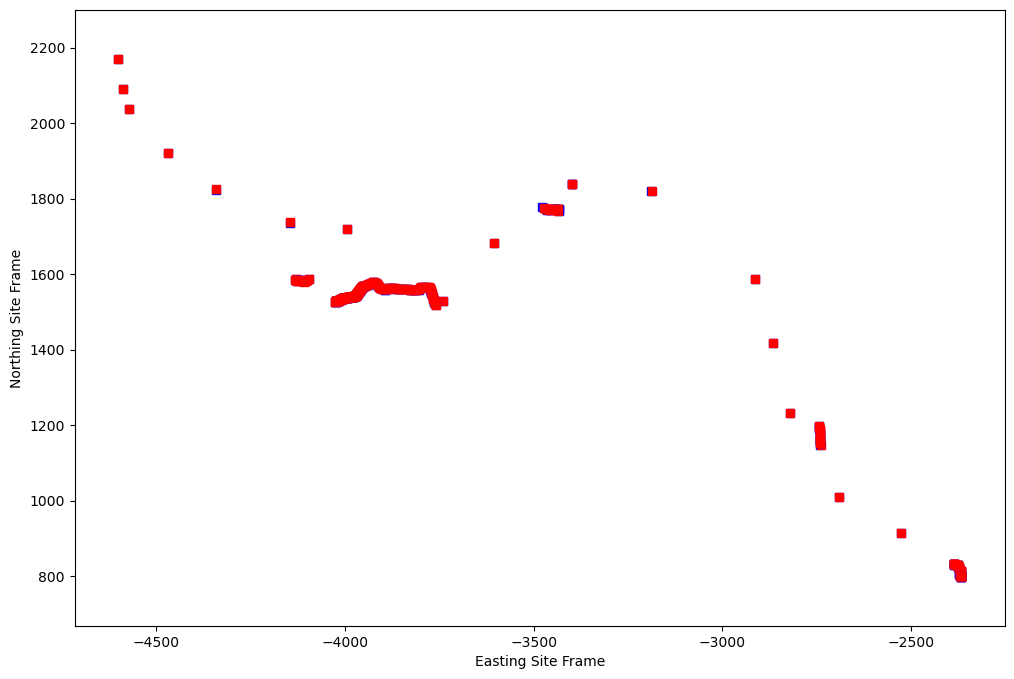

In [9]:
%%time

# time.sleep(1000)

%run MPPP.py

image_list_process( IMG_paths, directory_output, suf, find_offsets_mode = 0 )

In [7]:
def xyz_shift_offsets( site, drive ):
    
    '''
    xyz_shift_offsets finds most accurate Site-Nav offset for each site index and drive
    
    '''

    # print( site, drive )

    parent_path  = os.path.split( os.getcwd() )[0]
    waypoint_shift_path = os.path.join( parent_path, 'params/Mars2020_waypoint_shifts.csv' )

    shift_params = np.loadtxt( waypoint_shift_path, delimiter=',', skiprows=1 )

    site_shifts  = shift_params[ np.where( shift_params[:,1]==site)[0] ]
    site_drives  = site_shifts[:,2]

    if drive in site_drives:
        drive_site_shift = site_shifts[ np.where( site_shifts[:,2]==drive)[0] ][0,:]

    elif drive > site_drives.min() and drive < site_drives.max():
        drive_site_shift = interp1d( site_shifts[:,2], site_shifts, axis=0)(drive)

    elif drive >= site_drives.max():
        drive_site_shift = site_shifts[-1,:]

    else:
        drive_site_shift = np.zeros(12)

    # print( drive_site_shift )
    x_shift, y_shift, z_shift = drive_site_shift[9:]

    # x_shift, y_shift, z_shift = [ 0,0,0 ]
 
    return x_shift, y_shift, z_shift

# def xyz_shift_offsets_add( site, drive ):

In [8]:
import urllib.request, json 
waypoints_url = "https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json"

with urllib.request.urlopen( waypoints_url ) as url:
    data = json.loads(url.read().decode())

In [9]:
site  = 34
drive = 0



site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


    
indexes = [] 
lines   = []

for i in range(len(data['features'])):
    
    site_i = data['features'][i]['properties']['site']
    
    if site_i == site:
        
        sol_i   =  data['features'][i]['properties']['sol']
        drive_i =  data['features'][i]['properties']['drive']
        E_i = np.float64(data['features'][i]['properties']['easting'])   - np.float64(site3_E)
        N_i = np.float64(data['features'][i]['properties']['northing'])  - np.float64(site3_N)
        A_i = np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A)
        
        line_i  =   '{}\t{}\t{}\t'.format(sol_i,site_i,drive_i)+\
                    '{:.3f}\t{:.3f}\t{:.3f}\t'.format(0,0,0)+\
                    '{:.3f}\t{:.3f}\t{:.3f}\t'.format( E_i, N_i, A_i )
           
        indexes.append( i )
        lines.append( line_i )
        
lines

['715\t34\t0\t0.000\t0.000\t0.000\t-2867.720\t1421.358\t82.962\t',
 '716\t34\t952\t0.000\t0.000\t0.000\t-2913.638\t1591.495\t86.760\t',
 '717\t34\t2098\t0.000\t0.000\t0.000\t-3005.175\t1762.912\t91.759\t',
 '718\t34\t3196\t0.000\t0.000\t0.000\t-3192.771\t1822.324\t94.970\t',
 '719\t34\t4394\t0.000\t0.000\t0.000\t-3402.497\t1838.044\t106.989\t',
 '721\t34\t5120\t0.000\t0.000\t0.000\t-3433.487\t1767.285\t110.875\t']

In [10]:
lines   = []

for i in range(len(data['features'])):
    
    sol_i   =  data['features'][i]['properties']['sol']
    site_i = data['features'][i]['properties']['site']
    drive_i =  data['features'][i]['properties']['drive']
    
    if drive_i == 0:
        
        E_i = np.float64(data['features'][i]['properties']['easting'])   - np.float64(site3_E)
        N_i = np.float64(data['features'][i]['properties']['northing'])  - np.float64(site3_N)
        A_i = np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A)
        
#         line_i  =  '{}\t{}\t{}\t'.format(sol_i,site_i,drive_i)+\
#                     '{:.3f}\t{:.3f}\t{:.3f}\t'.format(0,0,0)+\
#                     '{:.3f}\t{:.3f}\t{:.3f}\t\n'.format( E_i, N_i, A_i )
        line_i  =  [ int(sol_i), int(site_i), int(drive_i), 0, 0, 0, '{:.3f}'.format(E_i), '{:.3f}'.format(N_i),  '{:.3f}'.format(A_i) ]
        print( line_i )
        lines.append( line_i )


[13, 3, 0, 0, 0, 0, '0.000', '0.000', '0.000']
[84, 4, 0, 0, 0, 0, '78.194', '-24.177', '0.610']
[130, 5, 0, 0, 0, 0, '47.200', '-525.883', '-0.724']
[157, 6, 0, 0, 0, 0, '42.959', '-1003.669', '-15.012']
[180, 7, 0, 0, 0, 0, '-366.571', '-823.192', '-4.614']
[248, 8, 0, 0, 0, 0, '-442.276', '-632.051', '0.756']
[286, 9, 0, 0, 0, 0, '-534.830', '-709.314', '-4.528']
[359, 10, 0, 0, 0, 0, '56.611', '-233.380', '0.191']
[361, 11, 0, 0, 0, 0, '87.262', '-43.457', '1.188']
[381, 12, 0, 0, 0, 0, '193.350', '258.971', '0.154']
[382, 13, 0, 0, 0, 0, '452.860', '389.596', '-1.292']
[385, 14, 0, 0, 0, 0, '621.342', '750.545', '1.089']
[387, 15, 0, 0, 0, 0, '601.229', '1176.533', '2.169']
[389, 16, 0, 0, 0, 0, '199.910', '1403.036', '6.720']
[394, 17, 0, 0, 0, 0, '71.503', '1397.758', '7.793']
[396, 18, 0, 0, 0, 0, '-277.375', '1348.107', '12.167']
[399, 19, 0, 0, 0, 0, '-664.104', '1151.764', '12.919']
[402, 20, 0, 0, 0, 0, '-1174.414', '947.725', '17.851']
[405, 21, 0, 0, 0, 0, '-1636.261', '7

## Ignore the notes below

In [11]:
# '''
# df_refs : pandas dataframe that holds reference info for each image

# data saves in the output directory as a CSV file 'df'+output+'.csv' and as a python pickle 'df'+output+'.pkl'

# '''

# df_refs = pd.DataFrame( 
#     columns = [ 
#         'sol',           # sol number or Mars day since landing is a natural way to describe images.
#         'site',          # site index for the rover's location, site 3 is the landing site
#         'drive',         # drive index is where the rover is relative to the current site frame
#         'time',          # datetime of image capture
        
#         'xyz_enu',       # postition XYZ values in meters ENU = [xEast, yNorth, zUp ] from site 3 (note: as Metashape interprets XYZ)
#         'xyz_ned',       # postition XYZ values in meters NED = [xNorth, yEast, zDown] from site 3
#         'rot_rpy',       # rotation angles in RPY = [roll, pitch, yaw] in degrees (as Metashape interprets roll-pitch-yaw)
#         'rot_ypr',       # rotation angles in YPR = [yaw, pitch, roll] in degrees 
#         'rot_opk',       # rotation angles in OPK = [omega, phi, kappa] in degrees 
        
#         'site_wy',       # waypoint site index, same as the current site if 'site_wy' == 'site' 
#         'drive_wp',      # waypoint drive index, same as the current drive if 'drive_wy' == 'drive'      
#         'xyz_wp',        # waypoint postition XYZ values in meters NED = [xNorthing, yEasting, zElevation]
#         'xyz_site3'      # postition of site3 (OEB landing site) in meters NED = [xNorth, yEast, zDown], 'xyz_site3'=[0,0,0] if site3 is the default reference frame
#         'nee_site3'      # postition of site3 (OEB landing site) in meters NED = [xNorthing, yEasting, zElevation]
#         'lle_site3'      # postition in [longitude, latitude, elevation] Mars global coordinates        
       
#         'cahvor',        # the CAHVOR or CAHVORE camera model in rover frame [xFront, yRight, zDown]
#         'az_site',       # site-frame azimuth pointing in degrees clockwise from the North vector 
#         'el_site',       # site-frame elevation pointing in degrees positive from the horizone
#         'az_rover',      # rover-frame azimuth pointing in degrees clockwise from the rover's forward vector
#         'el_rover',      # rover-frame elevation pointing in degrees positive from the forward-right plane       
        
#         'ref',           # string that forms the image's line in the reference file for import to software (Metashape)
#         'filename',      # file name with .IMG extension
#         'filepath',      # complete file path to image at run time
# ])


# df_refs

In [12]:
# ignore the below cells

In [13]:
# For find_offset_mode = 1

# # pos_lines  = []
# # rover_xyzs = []
# # im_xyzs    = []
# # sols       = []
# # rmcs = []
sites  = [ rmcs[i][0] for i in range(len(rmcs))[::-1] ]
drives = [ rmcs[i][1] for i in range(len(rmcs))[::-1] ]
Xs     = [ rover_xyzs[i][0] for i in range(len(rover_xyzs))[::-1] ]
Ys     = [ rover_xyzs[i][1] for i in range(len(rover_xyzs))[::-1] ]
Zs     = [ rover_xyzs[i][2] for i in range(len(rover_xyzs))[::-1] ]

table = np.stack( [sols[::-1], sites, drives, Xs, Ys, Zs], axis=1)
np.round( table, 4 )

np.savetxt( directory_output+"/offsets.csv", table, delimiter="\t")

In [14]:
# Scam flatfield

path = 'C:/Users/cornell/Mastcam-Z/ws/seitah'
pre = 'L*_0510*'

RAD_paths = [] \
          + sorted( glob.glob(  path + '/' +pre+'*R*_N*.IMG' ) ) \

RAD_paths

ims = []
for i in range(len(RAD_paths))[:]:
    
    im_image = PDS3Image.open( RAD_paths[i] ).image
    ims.append( np.float64( im_image) )
    
flat = np.mean( ims, axis=0)
for i in range(3):
    flat[:,:,i] /= np.mean( flat[700:-700,700:-700,i] )
    
plt.imshow( flat/1.5 )

C:\Users\cdt59\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdt59\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: invalid index to scalar variable.

In [ ]:
x = np.arange(0, 2048)
y = np.arange(0, 2048)
xv, yv = np.meshgrid(x, y)

y0, x0, r0, p = [900,1000,1000,3]
dv = ( (xv-x0)**2 + (yv-y0)**2 )**(p/2)
dv /= (r0**p)*2
dv += 1

# lim = .8
# dv[ dv<lim]  =lim

dflat = flat.copy()
for i in range(3):
    dflat[:,:,i] *= dv
    
plt.imshow( dflat/2 )
plt.colorbar()

In [ ]:
dvl = np.mean( dflat[:,1000:1300], axis=1)
plt.plot(dvl)

dvl = np.mean( flat[:,1000:1300], axis=1)
plt.plot(dvl)
# flat = dflat.copy()

In [2]:
import urllib.request, json 

'''

https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json

https://docs.google.com/spreadsheets/d/1GSNJL-e5iROCaKUC4BXL_OA8hWy8vUdfCN7levRNkZA/edit#gid=1232397498

''' 
# path =  'C:/Users/cornell/Downloads/M20_waypoints.json'
# with open( path ) as f:
#     data = json.load(f)

with urllib.request.urlopen("https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json") as url:
    data = json.loads(url.read().decode())

    
site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


for i in range(len(data['features']))[::-1]:
    
    print( data['features'][i]['properties']['sol'],'\t',
           data['features'][i]['properties']['site'], '\t',
           data['features'][i]['properties']['drive'],'\t',
           ''+'\t',''+'\t',''+'\t',
           np.round( np.float64(data['features'][i]['properties']['easting'])- np.float64(site3_E), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['northing'])- np.float64(site3_N), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A), 3),'\t',
         )

766 	 38 	 2208 	 	 	 	 -4588.678 	 2090.374 	 150.016 	
765 	 38 	 1808 	 	 	 	 -4575.314 	 2041.085 	 149.421 	
764 	 38 	 944 	 	 	 	 -4473.221 	 1919.66 	 149.203 	
763 	 38 	 0 	 	 	 	 -4342.779 	 1829.788 	 147.744 	
762 	 37 	 4972 	 	 	 	 -4151.261 	 1736.975 	 136.521 	
759 	 37 	 3758 	 	 	 	 -3991.639 	 1722.235 	 128.364 	
755 	 37 	 2562 	 	 	 	 -4133.165 	 1583.767 	 132.985 	
755 	 37 	 2462 	 	 	 	 -4119.97 	 1584.295 	 132.353 	
753 	 37 	 1798 	 	 	 	 -4024.061 	 1526.992 	 127.333 	
736 	 37 	 0 	 	 	 	 -3761.177 	 1516.511 	 120.831 	
736 	 36 	 3398 	 	 	 	 -3761.177 	 1516.511 	 120.831 	
736 	 36 	 3368 	 	 	 	 -3756.314 	 1515.569 	 120.859 	
732 	 36 	 3294 	 	 	 	 -3744.099 	 1525.786 	 120.767 	
731 	 36 	 1610 	 	 	 	 -3605.815 	 1677.562 	 114.663 	
731 	 36 	 334 	 	 	 	 -3490.188 	 1777.048 	 107.469 	
727 	 36 	 0 	 	 	 	 -3433.487 	 1767.285 	 110.875 	
726 	 35 	 0 	 	 	 	 -3433.487 	 1767.285 	 110.875 	
721 	 34 	 5120 	 	 	 	 -3433.487 	 1767.285 	 